# Notebook destinado a segunda parte do PP1 da disciplina de RNA 2020.1 - Colaboradores Jakson Protázio, Fabrizio Honda e Dayvson Silva.

## Importando as bibliotecas necessárias 

In [28]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.style.use('grayscale')

## Importando o dataset limpo

> Formas alternativas de leitura do dataset do github

In [29]:
#pd.read_csv('https://raw.githubusercontent.com/userddssilva/Analise-COVID19-PP1-RNA2020.1/master/dataset/dataset_limpo_covid19_manaus.csv?token=AMHWGQNWN4HALQAJZ5OP2HC7H7CDS')
#.read_csv('https://raw.githubusercontent.com/userddssilva/Analise-COVID19-PP1-RNA2020.1/master/dataset/dataset_covid19_manaus.csv?token=AMHWGQPMBW2HL4RB3VNPKOC7H7CHE', encoding='ISO-8859-1', sep=';')

In [30]:
df_dataset = pd.read_csv('/content/dataset_limpo_covid19_manaus.csv')
df_dataset

,idade,sexo,bairro,conclusao,dt_notificacao,tipo_teste
0,25,F,ADRIANOPOLIS,Recuperado,20/03/2020,RT-PCR
1,41,F,BETANIA,Recuperado,27/03/2020,RT-PCR
2,37,M,CIDADE NOVA,Recuperado,27/04/2020,TESTE RÁPIDO - ANTICORPO
3,44,M,SAO JORGE,Recuperado,27/04/2020,TESTE RÁPIDO - ANTICORPO
4,27,F,COLONIA TERRA NOVA,Recuperado,24/04/2020,TESTE RÁPIDO - ANTICORPO
...,...,...,...,...,...,...
6355,14,F,DA PAZ,Recuperado,25/06/2020,TESTE RÁPIDO - ANTÍGENO
6356,5,F,REDENCAO,Recuperado,18/06/2020,TESTE RÁPIDO - ANTÍGENO
6357,70,F,DOM PEDRO I,Recuperado,02/06/2020,TESTE RÁPIDO - ANTÍGENO
6358,68,M,JORGE TEIXEIRA,Recuperado,01/06/2020,RT-PCR


**1. Construa um histograma denotando a quantidade de casos nos 10 bairros em que houve mais casos registrados. Inclua todos os bairros remanescentes em uma categoria denominada “Outros.” Denote as informações de maneira percentual.**

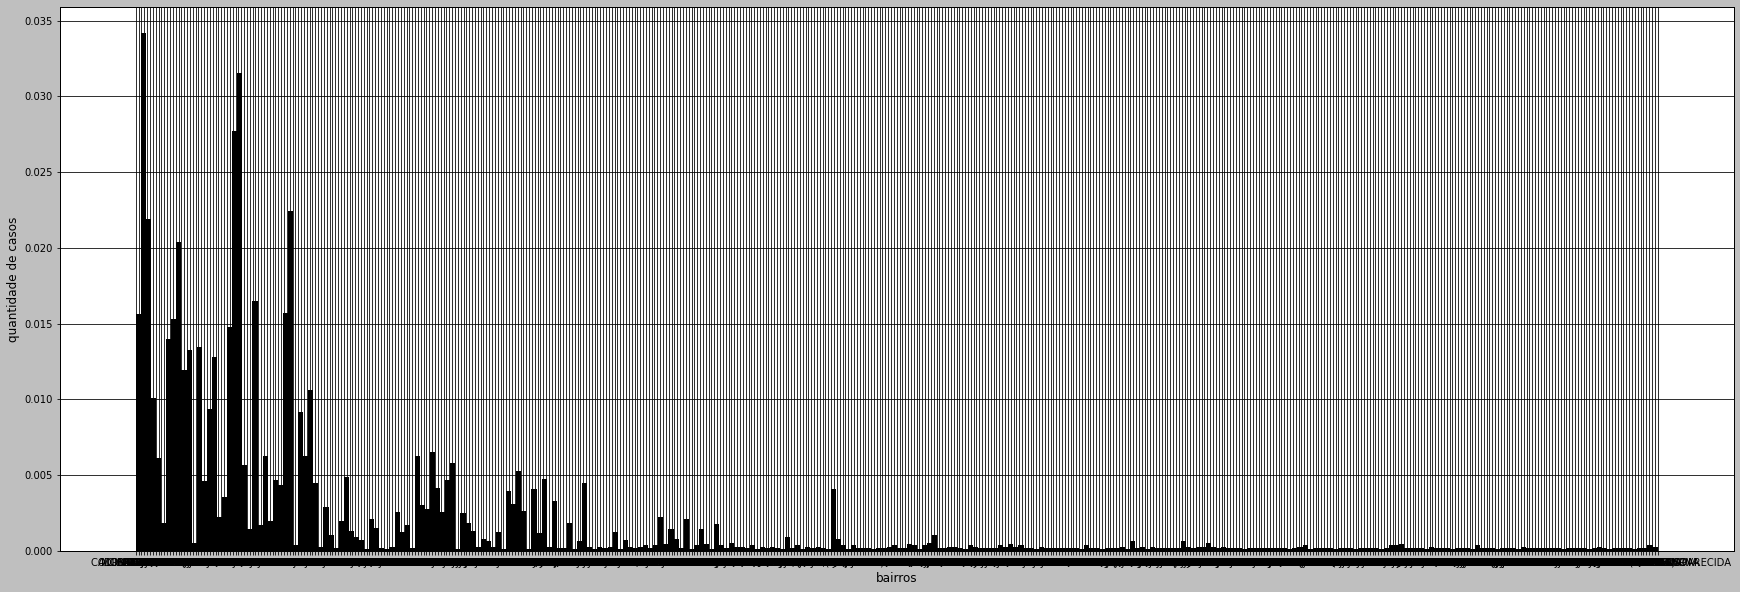

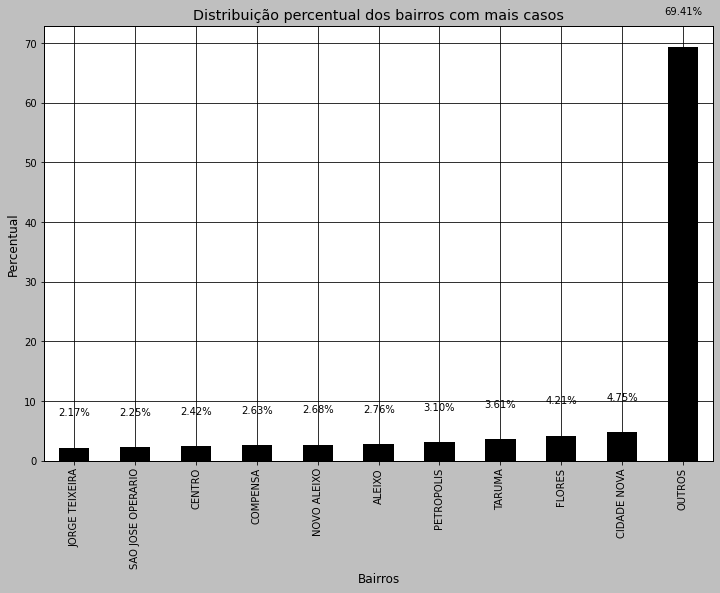

In [31]:
x = df_dataset.bairro
plt.figure(figsize=(30,10))
plt.hist(x, bins=300, density=100)
plt.ylabel('quantidade de casos')
plt.xlabel('bairros')
plt.show()

values_by_bairro = df_dataset.bairro.value_counts()
y = values_by_bairro[0:10].sort_values().values
x = list(values_by_bairro[0:10].sort_values().keys())
n_outros = sum(values_by_bairro[11:].sort_values().values)
y = np.append(y, [n_outros])
y = (y/sum(y))*100
x.append('OUTROS')

# Bring some raw data.
frequencies = y
# In my original code I create a series and run on that, 
# so for consistency I create a series from the list.
freq_series = pd.Series(frequencies)

x_labels = x

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Distribuição percentual dos bairros com mais casos')
ax.set_xlabel('Bairros')
ax.set_ylabel('Percentual')
ax.set_xticklabels(x_labels)

rects = ax.patches

# Make some labels.
labels = ["%.2f%%" % i for i in y]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
plt.show()


**2. Denote, por sexo, o boxplot da idade dos casos confirmados. Há outliers?**

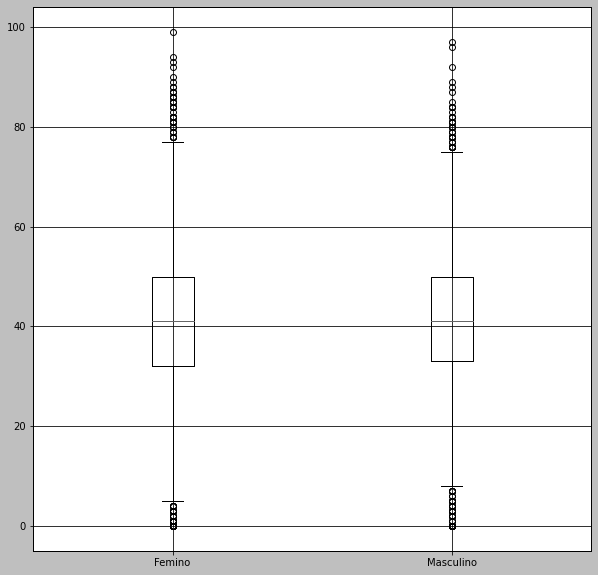

In [32]:
fame = df_dataset[df_dataset['sexo'] == 'F'].idade.values
male = df_dataset[df_dataset['sexo'] == 'M'].idade.values

plt.figure(figsize=(10, 10))
plt.boxplot([fame, male], labels=('Femino', 'Masculino'))
plt.show()


**3. Denote em um gráfico de barras o número de novos casos por dia, considerando os 10 últimos dias na base de dados.**

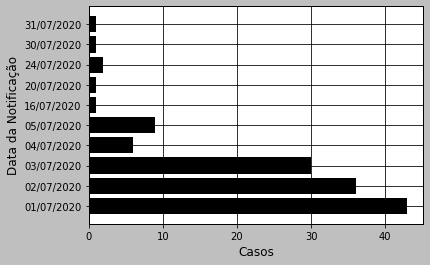

In [33]:
dates = df_dataset

#datas transformadas pro formato Ano-Mês-Dia
dates['dt_notificacao'] = pd.to_datetime(dates['dt_notificacao'], dayfirst=True)

#datas ordenadas
dates = dates.sort_values(by='dt_notificacao')

#obetenção do número de casos
dates_cases = dates.groupby(['dt_notificacao']).size()

n = dates_cases.size
n = n-10

cases = dates_cases[n:].values

casos = []

for i in cases:
  casos.append(i)

#salvando as 10 datas
dates = dates.groupby(['dt_notificacao']).head(1)
date = dates.dt_notificacao.values


datas = []

for i in range(len(date)-10,len(date)):
  datas.append(date[i])

#Transformando as datas para o formato dia/mês/ano
for i in range(0,len(datas)):
  data = pd.to_datetime(str(datas[i])) 
  datas[i] = data.strftime('%d/%m/%Y')

#Plotando o gráfico
plt.barh(datas, casos)

plt.ylabel('Data da Notificação')
plt.xlabel('Casos')
plt.show()

In [34]:
df_dataset.groupby(by=['dt_notificacao','conclusao']).count().reset_index().sort_values(by='dt_notificacao').tail(10)

,dt_notificacao,conclusao,idade,sexo,bairro,tipo_teste
118,2020-07-01,Recuperado,43,43,43,43
119,2020-07-02,Recuperado,36,36,36,36
120,2020-07-03,Recuperado,30,30,30,30
121,2020-07-04,Recuperado,6,6,6,6
122,2020-07-05,Recuperado,9,9,9,9
123,2020-07-16,Óbito,1,1,1,1
124,2020-07-20,Óbito,1,1,1,1
125,2020-07-24,Óbito,2,2,2,2
126,2020-07-30,Óbito,1,1,1,1
127,2020-07-31,Óbito,1,1,1,1


**4. Repita o gráfico anterior considerando o número de casos recuperado.**

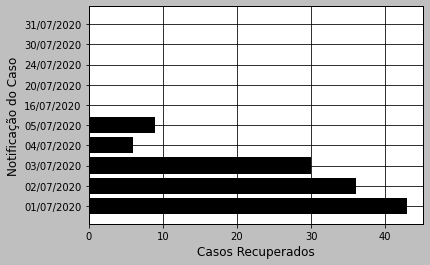

In [35]:
dates = df_dataset

#datas transformadas pro formato Ano-Mês-Dia
dates['dt_notificacao'] = pd.to_datetime(dates['dt_notificacao'], dayfirst=True)

#datas ordenadas
dates = dates.sort_values(by='dt_notificacao')

#obetenção do número de casos
dates_cases = dates.groupby(['dt_notificacao','conclusao']).size()

n = dates_cases.size
n = n-10

cases = dates_cases[n:].values

casos = []

for i in cases:
  casos.append(i)


#obtendo status da recuperacao
conclusao = []
for i in dates.conclusao:
  conclusao.append(i)

tam = len(conclusao)-10
conclusao = conclusao[tam:]

#obter quantidade de recuperados
df_casos_recuperados = dates.groupby(['dt_notificacao','conclusao']).size()
df_casos_recuperados

qtde_conclusoes = []

for i in df_casos_recuperados:
  qtde_conclusoes.append(i)

qtde_conclusoes = qtde_conclusoes[len(qtde_conclusoes)-10:]

#salvando as 10 datas
dates = dates.groupby(['dt_notificacao','conclusao']).head(1)
date = dates.dt_notificacao.values

#salvando as 10 datas
dates = dates.groupby(['dt_notificacao']).head(1)
date = dates.dt_notificacao.values


datas = []

for i in range(len(date)-10,len(date)):
  datas.append(date[i])

#Transformando as datas para o formato dia/mês/ano
for i in range(0,len(datas)):
  data = pd.to_datetime(str(datas[i])) 
  datas[i] = data.strftime('%d/%m/%Y')

df_index_conclusoes = dates.conclusao

index_casos_recuperados = []

for i in df_index_conclusoes:
  index_casos_recuperados.append(i)

tam2 = len(index_casos_recuperados)-10
index_casos_recuperados = index_casos_recuperados[tam2:]

label_recuperado = []
for i in range(0,10):
  if (index_casos_recuperados[i]=="Recuperado"):
    label_recuperado.append(qtde_conclusoes[i])
  else:
    label_recuperado.append(0)

#Plotando o gráfico
plt.barh(datas, label_recuperado)

plt.ylabel('Notificação do Caso')
plt.xlabel('Casos Recuperados')
plt.show()





**5. Construa um histograma que denote a quantidade percentual de casos por grupo etário, considerando que cada grupo contempla uma década (0 a 10 anos, 11 a 20 anos, etc.).**

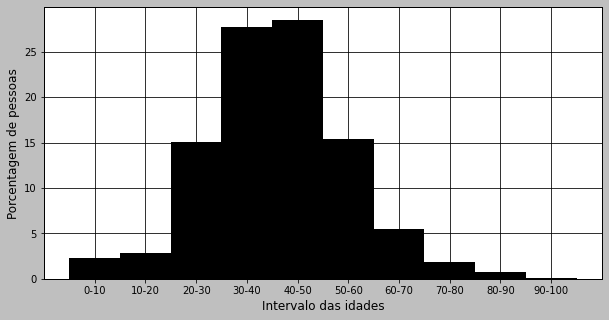

In [36]:
idades = df_dataset.idade.values
max_val = idades.max()
min_val = idades.min()

amount_intervals = []
a = 0
k = []

for intervalo in range(10, max_val+10, 10):
    b = intervalo
    amount_interval = df_dataset[(df_dataset['idade'] >= a) & (df_dataset['idade'] <= b)].shape[0]
    amount_intervals.append(amount_interval)
    k.append(b)
    a = intervalo +1

amount_intervals = np.array(amount_intervals)
amount_intervals = (amount_intervals/sum(amount_intervals))*100

x_labels = ['0-10'] + [str(i-10)+'-'+str(i) for i in k[1:]]
plt.figure(figsize=(10, 5))
plt.bar(x_labels, amount_intervals, width=1)
plt.xlabel('Intervalo das idades')
plt.ylabel('Porcentagem de pessoas')
plt.show()

**6. Elabore um gráfico que mostra o cumulativo de casos notificados ao longo do tempo.**

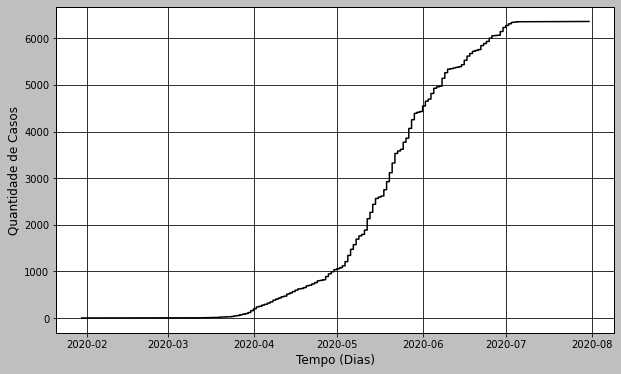

In [37]:
#obter as datas
dates = df_dataset

#datas transformadas pro formato Ano-Mês-Dia
dates['dt_notificacao'] = pd.to_datetime(dates['dt_notificacao'], dayfirst=True)

#datas ordenadas
dates = dates.sort_values(by='dt_notificacao')

date = dates.dt_notificacao.values

# casos
datas = []


for i in range(0,len(date)):
  datas.append(date[i])

casos = []
for i in range(0,len(datas)):
  casos.append(1)

for i in range(0,len(datas)):
  if (i+1<len(datas)):
    casos[i+1] = casos[i] + casos[i+1]

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(datas,casos,label="casos")
ax.set_xlabel('Tempo (Dias)')
ax.set_ylabel('Quantidade de Casos')

plt.show()

**7. Faça um gráfico do tipo scatterplot que denote a idade versus o número total de casos registrado para aquela idade. Aproveite o processamento efetuado para o cálculo da correlação. É possível observar alguma tendência?**

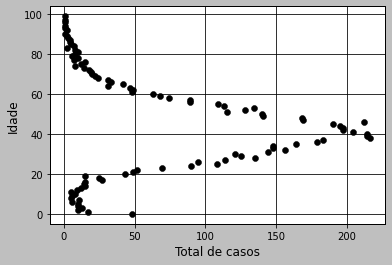

In [38]:
data = df_dataset.groupby(['idade']).size()
y = data.index
x = data.values

plt.scatter(x,y)
plt.ylabel('Idade')
plt.xlabel('Total de casos')
plt.show()